# Blog 3 - Getting everything running and some visualizations
This is the 3rd installment of my Chipy mentorship blog. I went from knowing almost nothing, to starting to understand the basics of python. 

I picked up a few tricks along the way, such as, quick keys in Jupyter notebooks and how to actually use Github to go from my desktop to laptop. My folder is a bit of a mess but overall I am very happy that I was actually able to get the full code to work. 

I also figured out the different markdowns so that I could put my full blog post and code in a Jupyter notebook instead of trying to combine things.
### Refresher and Background
As a reminder on what I am trying to accomplish, NFL betting markets are a huge industry. One type of bet is picking if the total score will be over or under a betting line. For example, the line for the Bears / Vikings game this Sunday is 44.5 points. I am trying to create a machine learning algorithm that will tell me if the two teams will score a combined total of more than 44.5 points


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import the csv file
df = pd.read_csv('nfl_betting.csv')

In [2]:
#remove the weather detail column because it is unstructred free text
#remove the schedule date because i have separate columns with year and week of the season
#remove gameid
#remove games that did not have a betting line and have not occured
new_df = df.drop(['weather_detail','schedule_date','game_id'], axis = 1).dropna(subset = ['over_under_line', 
                                                                                          'score_home', 'weather_temperature', 'weather_wind_mph'])

In [4]:
#Make sure I have the columns I want to keep
new_df.columns

Index(['schedule_season', 'schedule_week', 'team_home', 'team_away', 'stadium',
       'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'score_home', 'score_away', 'stadium_neutral', 'schedule_playoff'],
      dtype='object')

In [3]:
#Next, I want to make sense of the data
new_df.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,9296.000000,9296.000000,9296.000000,9296.000000,9296.000000,9296.000000
mean,1998.929755,-5.348160,59.591652,7.462242,22.513339,19.786790
std,11.211571,3.414221,15.447166,5.696075,10.352862,10.040271
min,1967.000000,-26.500000,-6.000000,0.000000,0.000000,0.000000
25%,1990.000000,-7.000000,49.000000,2.000000,15.000000,13.000000
50%,1999.000000,-4.500000,63.000000,8.000000,22.000000,20.000000
75%,2009.000000,-3.000000,72.000000,11.000000,30.000000,27.000000
max,2017.000000,0.000000,95.000000,40.000000,62.000000,59.000000


#### This does not tell me very much about the data yet, other than I have over 9,000 rows of data for training and testing. Also, one average across the 60+ years of data so I would like to try to get averages by year.
#### But first I will do a little more data cleaning.

In [5]:
#replace text w/ numbers for the week 
new_df = new_df.replace(['Wildcard', 'WildCard','Division', 'Conference', 'Superbowl','SuperBowl'],[18,18,19,20,21,21])
#find what the column type is (convert everything to float>> new_df.dtypes
#convert 'schedule_week' from object to float
new_df['schedule_week'] = new_df.schedule_week.astype(float)
#convert the over underline from object to float
new_df.over_under_line = pd.to_numeric(new_df.over_under_line, errors = 'coerce')
#change humidity to a float and if there are erros change to NaN
new_df.weather_humidity = pd.to_numeric(new_df.weather_humidity, errors = 'coerce')

#### One thing I wanted to explore was if the data was significantly different over the years. My first attempt was to put specific collums in a box plot

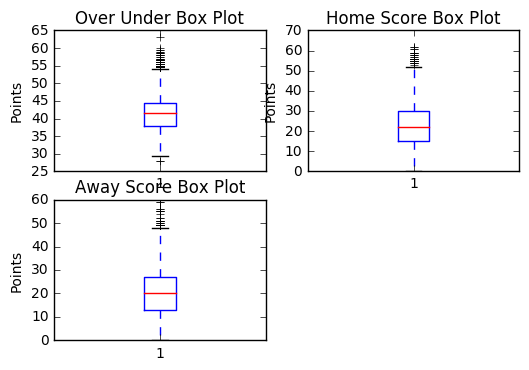

In [41]:
#try creating different box plots with the data
ou_box_plot = np.array(new_df['over_under_line'])
plt.subplot(221)
plt.boxplot(ou_box_plot)
plt.ylabel('Points')
plt.title('Over Under Box Plot')
home_box_plot = np.array(new_df['score_home'])
plt.subplot(222)
plt.boxplot(home_box_plot)
plt.ylabel('Points')
plt.title('Home Score Box Plot')
away_box_plot = np.array(new_df['score_away'])
plt.subplot(223)
plt.boxplot(away_box_plot)
plt.ylabel('Points')
plt.title('Away Score Box Plot')
plt.show()

#### Next, I wanted to try to get an average by season of the various stats to see how that changed over theyears

In [42]:
#first i created a function that would remove duplicates from my year column so I could have an x- axis
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list


In [43]:
#create a variable of the years without duplicates
years_only = Remove(new_df['schedule_season'])

y=0.150808x+(-259.971056)


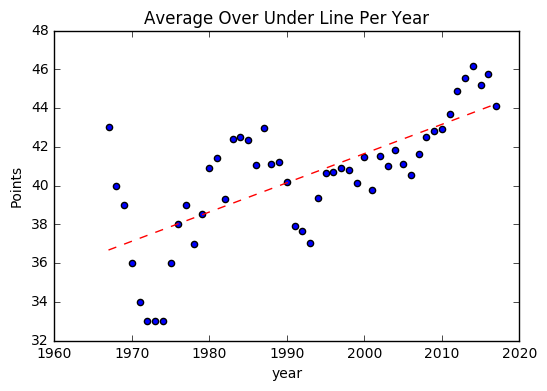

In [51]:
#plot the average over under by year
season_avgs = new_df.groupby('schedule_season').mean()
season_avgs['over_under_line']
plt.scatter(years_only, season_avgs['over_under_line'])
plt.xlabel('year')
plt.ylabel('Points')
plt.title('Average Over Under Line Per Year')

# calc the trendline
z = np.polyfit(years_only, season_avgs['over_under_line'], 1)
p = np.poly1d(z)
plt.plot(years_only,p(years_only),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

#### Note that the games from the 60s and 70s were primarily playoff games or superbowls and very few games have data so the average is probably not very representative.

#### Out of curiosity, I wanted to see what it would look like if I did a scatter plot for all points

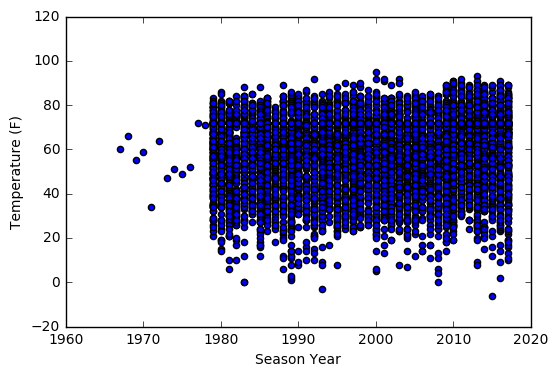

In [52]:
plt.scatter(new_df['schedule_season'],new_df['weather_temperature'])
plt.ylabel('Temperature (F)')
plt.xlabel('Season Year')
plt.show()

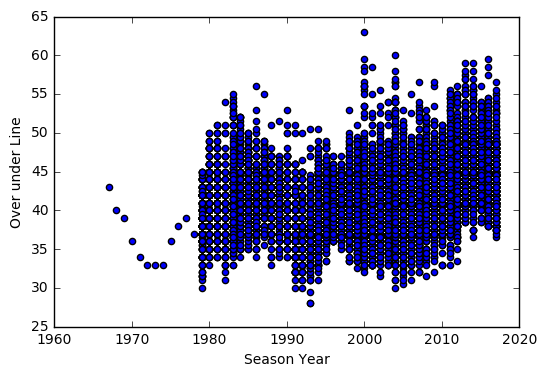

In [53]:
plt.scatter(new_df['schedule_season'],new_df['over_under_line'])
plt.ylabel('Over under Line')
plt.xlabel('Season Year')
plt.show()

#### After some visualization I move to the last bit of data processing and setting up my dependent and independent variables.

In [54]:
#replace NaN with a value 45
#The NaN cells were when games were played inside, so I took an average indoor humidity
new_df.weather_humidity.fillna(45, inplace = True)

In [55]:
#split the columns into independent and dependent variables then recombine
#dependent variable is in the middle of independent variables
x1 = new_df.iloc[:,0:11]
x2 = new_df.iloc[:,13:15]
x = pd.merge(x1, x2, left_index = True, right_index = True).values

In [56]:
#encode categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
#home team
x[:,2] = labelencoder_x.fit_transform(x[:,2])
#away team
x[:,3] = labelencoder_x.fit_transform(x[:,3])
#stadium
x[:,4] = labelencoder_x.fit_transform(x[:,4])
#team favorite
x[:,5] = labelencoder_x.fit_transform(x[:,5])
#neutral stadium? (True = neutral)
x[:,11] = labelencoder_x.fit_transform(x[:,11])
#playoff game?(True = playoff game)
x[:,12] = labelencoder_x.fit_transform(x[:,12])

In [57]:
#create over under line as independent variable
new_df['actual_score'] = new_df.score_home + new_df.score_away
#use lambda function to create the boolean to state if the score was over or under
new_df['over_line']=new_df.apply(lambda row: 1 if row.actual_score > row.over_under_line else 0, axis = 1)

In [58]:
#Create the dependent variable
y = new_df.iloc[:,16].values

In [59]:
#Split the Data into testing and Training set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [60]:
#Feature Scaling using Standard Sclaer
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

C:\Users\Cullen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Cullen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Cullen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [61]:
#Fit logistic regression to training set
from sklearn.svm import SVC
classifier = SVC(C = 2,kernel = 'linear', degree = 3)
classifier.fit(x_train, y_train)
#Predict test set results with the Logistic Regression model
y_pred = classifier.predict(x_test)
#Evaluate Logistic regression model with Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[829, 380],
       [724, 391]])

#### From what I understand, a quick way to evaluate the performance of the model is with the confusion matrix above. The top left and bottom right numbers were the correct predictions and the other two were incorrect. This gives me about 52% correct, so not very good. I tried several other classification techniques(logistic regression, decision tree, etc.) with no better luck. 

#### Over the next few weeks I plan to try to improve the accuracy or potentially find more meaningful data.